## 3.1. matplotlib
- 간단한 막대 그래프, 선 그래프, 또는 산점도를 그릴 때는 나쁘지 않다.

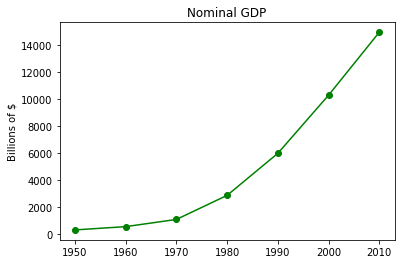

In [21]:
from matplotlib import pyplot as plt

years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]

# x축에는 연도, y축에는 GDP가 있는 선 그래프를 만들자.
plt.plot(years, gdp, color='green', marker='o', linestyle='solid')

# 제목을 더하자.
plt.title('Nominal GDP')

# y축에 레이블을 추가하자.
plt.ylabel('Billions of $')
plt.show()

## 3.2. 막대 그래프
- 막대 그래프(bar charts)는 이산적인 항목들에 대한 변화를 보여 줄 때 사용하면 좋다.

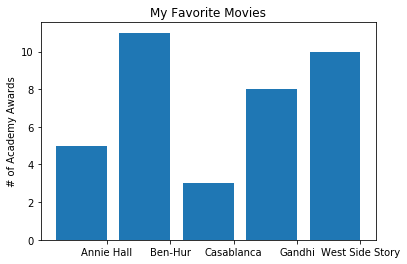

In [22]:
from matplotlib import pyplot as plt

movies = ['Annie Hall', 'Ben-Hur', 'Casablanca', 'Gandhi', 'West Side Story']
num_oscars = [5, 11, 3, 8, 10]

# 막대 너비의 기본값이 0.8이므로
# 막대가 가운데로 올 수 있도록 왼쪽 좌표에 0.1씩 더해 주자.
xs = [i + 0.1 for i, _ in enumerate(movies)]

# 왼편으로부터 x축의 위치가 xs이고 높이가 num_oscars인 막대를 그리자.
plt.bar(xs, num_oscars)
plt.ylabel('# of Academy Awards')
plt.title('My Favorite Movies')

# 막대의 가운데에 오도록 영화 제목 레이블을 달자.
plt.xticks([i + 0.5 for i, _ in enumerate(movies)], movies)
plt.show()

### 히스토그램(histogram)
- 히스토그램이란 정해진 구간에 해당되는 항목의 개수를 보여줌으로써 값의 분포를 관찰할 수 있는 그래프 형태이다.

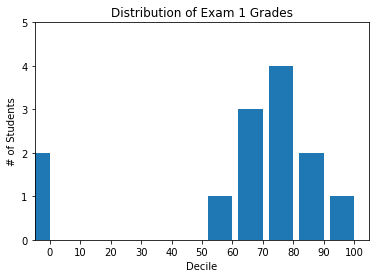

In [23]:
from matplotlib import pyplot as plt
from collections import Counter 

grades = [83, 95, 91, 87, 70, 0, 85, 82, 100, 67, 73, 77, 0]
decile = lambda grade: grade // 10 * 10
histogram = Counter(decile(grade) for grade in grades)

plt.bar([x - 4 for x in histogram.keys()],  # 각 막대를 왼쪽으로 4만큼 옮기고
       histogram.values(),  # 각 막대의 높이를 정해주고
       8)  # 너비는 8로 하자

plt.axis([-5, 105, 0, 5])  # x축은 -5부터 105, y축은 0부터 5

plt.xticks([10 * i for i in range(11)])  # x축의 레이블은 0, 10, ...., 100
plt.xlabel('Decile')
plt.ylabel('# of Students')
plt.title('Distribution of Exam 1 Grades')
plt.show()

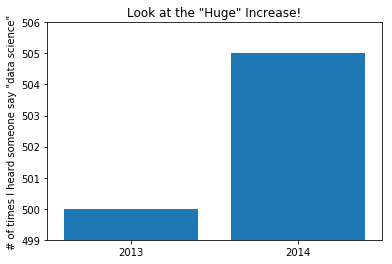

In [31]:
mentions = [500, 505]
years = [2013, 2014]

plt.bar([2013, 2014], mentions, 0.8)
plt.xticks(years)
plt.ylabel('# of times I heard someone say "data science"')

# 이렇게 하지 않으면 matplotlib이 x축에 0, 1 레이블을 달고
# 주변부 어딘가에 +2.013e3라고 표기해둘 것이다. (나쁜...!!)
plt.ticklabel_format(useOffset=False)

# 오해를 불러일으키는 y축은 500 이상의 부분만 보여 줄 것이다.
plt.axis([2012.5, 2014.5, 499, 506])
plt.title('Look at the "Huge" Increase!')
plt.show()

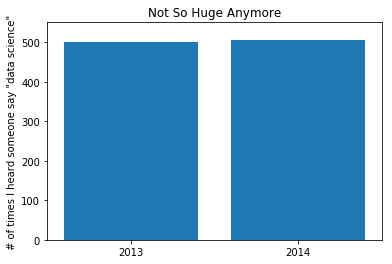

In [32]:
mentions = [500, 505]
years = [2013, 2014]

plt.bar([2013, 2014], mentions, 0.8)
plt.xticks(years)
plt.ylabel('# of times I heard someone say "data science"')

plt.ticklabel_format(useOffset=False)

plt.axis([2012.5, 2014.5, 0, 550])
plt.title('Not So Huge Anymore')
plt.show()

## 3.3. 선 그래프
- plt.plot()을 이용하면 선 그래프(line charts)를 그릴 수 있다.

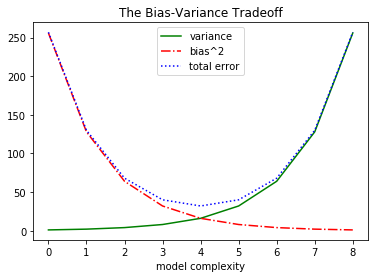

In [34]:
from matplotlib import pyplot as plt

variance = [1, 2, 4, 8, 16, 32, 64, 128, 256]
bias_squared = [256, 128, 64, 32, 16, 8, 4, 2, 1]
total_error = [x + y for x, y in zip(variance, bias_squared)]
xs = [i for i, _ in enumerate(variance)]

# 한 차트에 여러 개의 series를 그리기 위해 plt.plot을 여러 번 호출할 수 있다.
plt.plot(xs, variance, 'g-', label='variance')  # 초록색 실선
plt.plot(xs, bias_squared, 'r-.', label='bias^2')  # 붉은색 점선
plt.plot(xs, total_error, 'b:', label='total error')  # 파란색 점선

# 각 series에 label을 미리 달아 놨기 때문에
# 범례(legend)를 어렵지 않게 그릴 수 있다. 
# 여기서 loc=9는 'top center(위쪽 중앙)'을 의미한다.

plt.legend(loc=9)
plt.xlabel('model complexity')
plt.title('The Bias-Variance Tradeoff')
plt.show()

## 3.4. 산점도
- 산점도(scatterplots)는 두 변수 간의 연관 관계를 보여 주고 싶을 때 적합한 형태의 그래프이다.

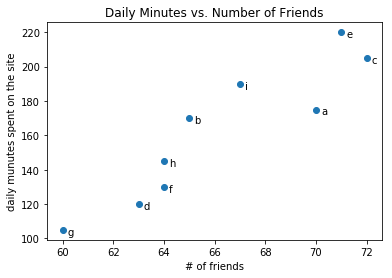

In [4]:
from matplotlib import pyplot as plt

friends = [70, 65, 72, 63, 71, 64, 60, 64, 67]
minutes = [175, 170, 205, 120, 220, 130, 105, 145, 190]
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

plt.scatter(friends, minutes)

# 각 포인트에 레이블을 달자.
for label, friend_count, minute_count in zip(labels, friends, minutes):
    plt.annotate(label,
                xy=(friend_count, minute_count),  # label을 데이터 포인터 근처에 두되
                xytext=(5, -5),  # 약간 떨어져 있게 하자
                textcoords='offset points')
    
plt.title('Daily Minutes vs. Number of Friends')
plt.xlabel('# of friends')
plt.ylabel('daily munutes spent on the site')
plt.show()

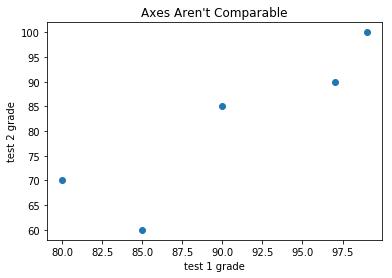

In [5]:
# 변수들끼리 비교할 때 matplotlib이 자동으로 축의 범위를 설정하게 하면 아래처럼 공정한 비교를 하지 못하게 될 수 있다.
test_1_grades = [99, 90, 85, 97, 80]
test_2_grades = [100, 85, 60, 90, 70]

plt.scatter(test_1_grades, test_2_grades)
plt.title("Axes Aren't Comparable")
plt.xlabel('test 1 grade')
plt.ylabel('test 2 grade')
plt.show()

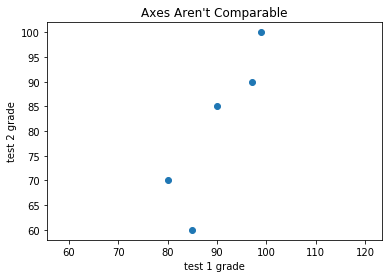

In [7]:
# 여기서 plt.axis('equal')이라는 명령을 추가하면 아래처럼 공정한 비교를 할 수 있게 된다.
# 이 그림을 보면 test 2에서 대부분의 편차가 발생했다는 사실을 알 수 있다.
test_1_grades = [99, 90, 85, 97, 80]
test_2_grades = [100, 85, 60, 90, 70]

plt.scatter(test_1_grades, test_2_grades)
plt.axis('equal')
plt.title("Axes Aren't Comparable")
plt.xlabel('test 1 grade')
plt.ylabel('test 2 grade')
plt.show()

## 3.5. 더 공부해 보고 싶다면
- seaborn은 matplotlib을 발전시킨 것으로, 더 아름답고 복잡한 시각화를 그릴 수 있게 해준다.
- D3.js는 웹을 위한 인터랙티브 시각화를 만드는 데 사용되는 자바스크립트 라이브러리이다.
- Bokeh는 D3.js 스타일의 시각화를 파이썬엥서 만들 수 있게 해주는 신생 라이브러리이다.
- ggplot은 R의 유명한 라이브러리 ggplot2를 파이썬에서 쓸 수 있게 한 것으로, '출판용 급'의 도표나 그래픽을 만드는 데 널리 사용된다.